### Import libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Load in Data and Summarize it

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.shape

(40428967, 24)

In [4]:
data.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

In [5]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [6]:
data['click'].value_counts()

0    33563901
1     6865066
Name: click, dtype: int64

### Pick columns to work with

In [7]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

I will be keeping all the columns for now before creating my model, so I can find the best combination of features to analyze.

### Data Cleaning

Previously, I checked the data types and found there are both numerical and string variables. For my analysis, it is not necessary to change any of these variable types because they are all properly assigned.

I will be dropping the 'id' and the 'site_id' columns because they have no numerical importance to my analysis or overall project.

In [8]:
data = data.drop(['id', 'site_id'], axis=1)

In [9]:
data.shape

(40428967, 22)

#### Remove Null values

In the previous notebook I already found that there were no null values in the data.

### Exploration of each variable

For the sake of easy EDA and graphic visualization, I will be creating a temporary dataframe (called data_graph) with less data, so my code will run faster. 

In [10]:
indexes = data[data.click == 0].sample(frac=0.999).index
data_graph = data.drop(indexes)

index = data_graph[data_graph.click == 1].sample(frac=0.75).index
data_graph = data_graph.drop(index)

In [11]:
data_graph.shape

(1749830, 22)

In [14]:
ex_data = data_graph[0:3000]

I tested a variety of plots to explore different features in my data and see if I could find any relationships between them. I used pandas boxplot, seaborn pairplot, and seaborn catplots. 

use seaborn sns.catplot(data=data, x="", y="", hue="click", kind="swarm")
and use x as a variable like banner pos and y as each separate feature like site_domain or site_category or app_id, etc. 

- need to graph this for every single variable to see a correlation or something to help me determine which features are important. 

<AxesSubplot:title={'center':'banner_pos'}, xlabel='click'>

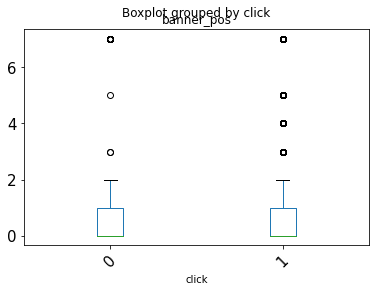

In [15]:
data_graph.boxplot(by='click', column ='banner_pos', grid=False, rot=45, fontsize=15)

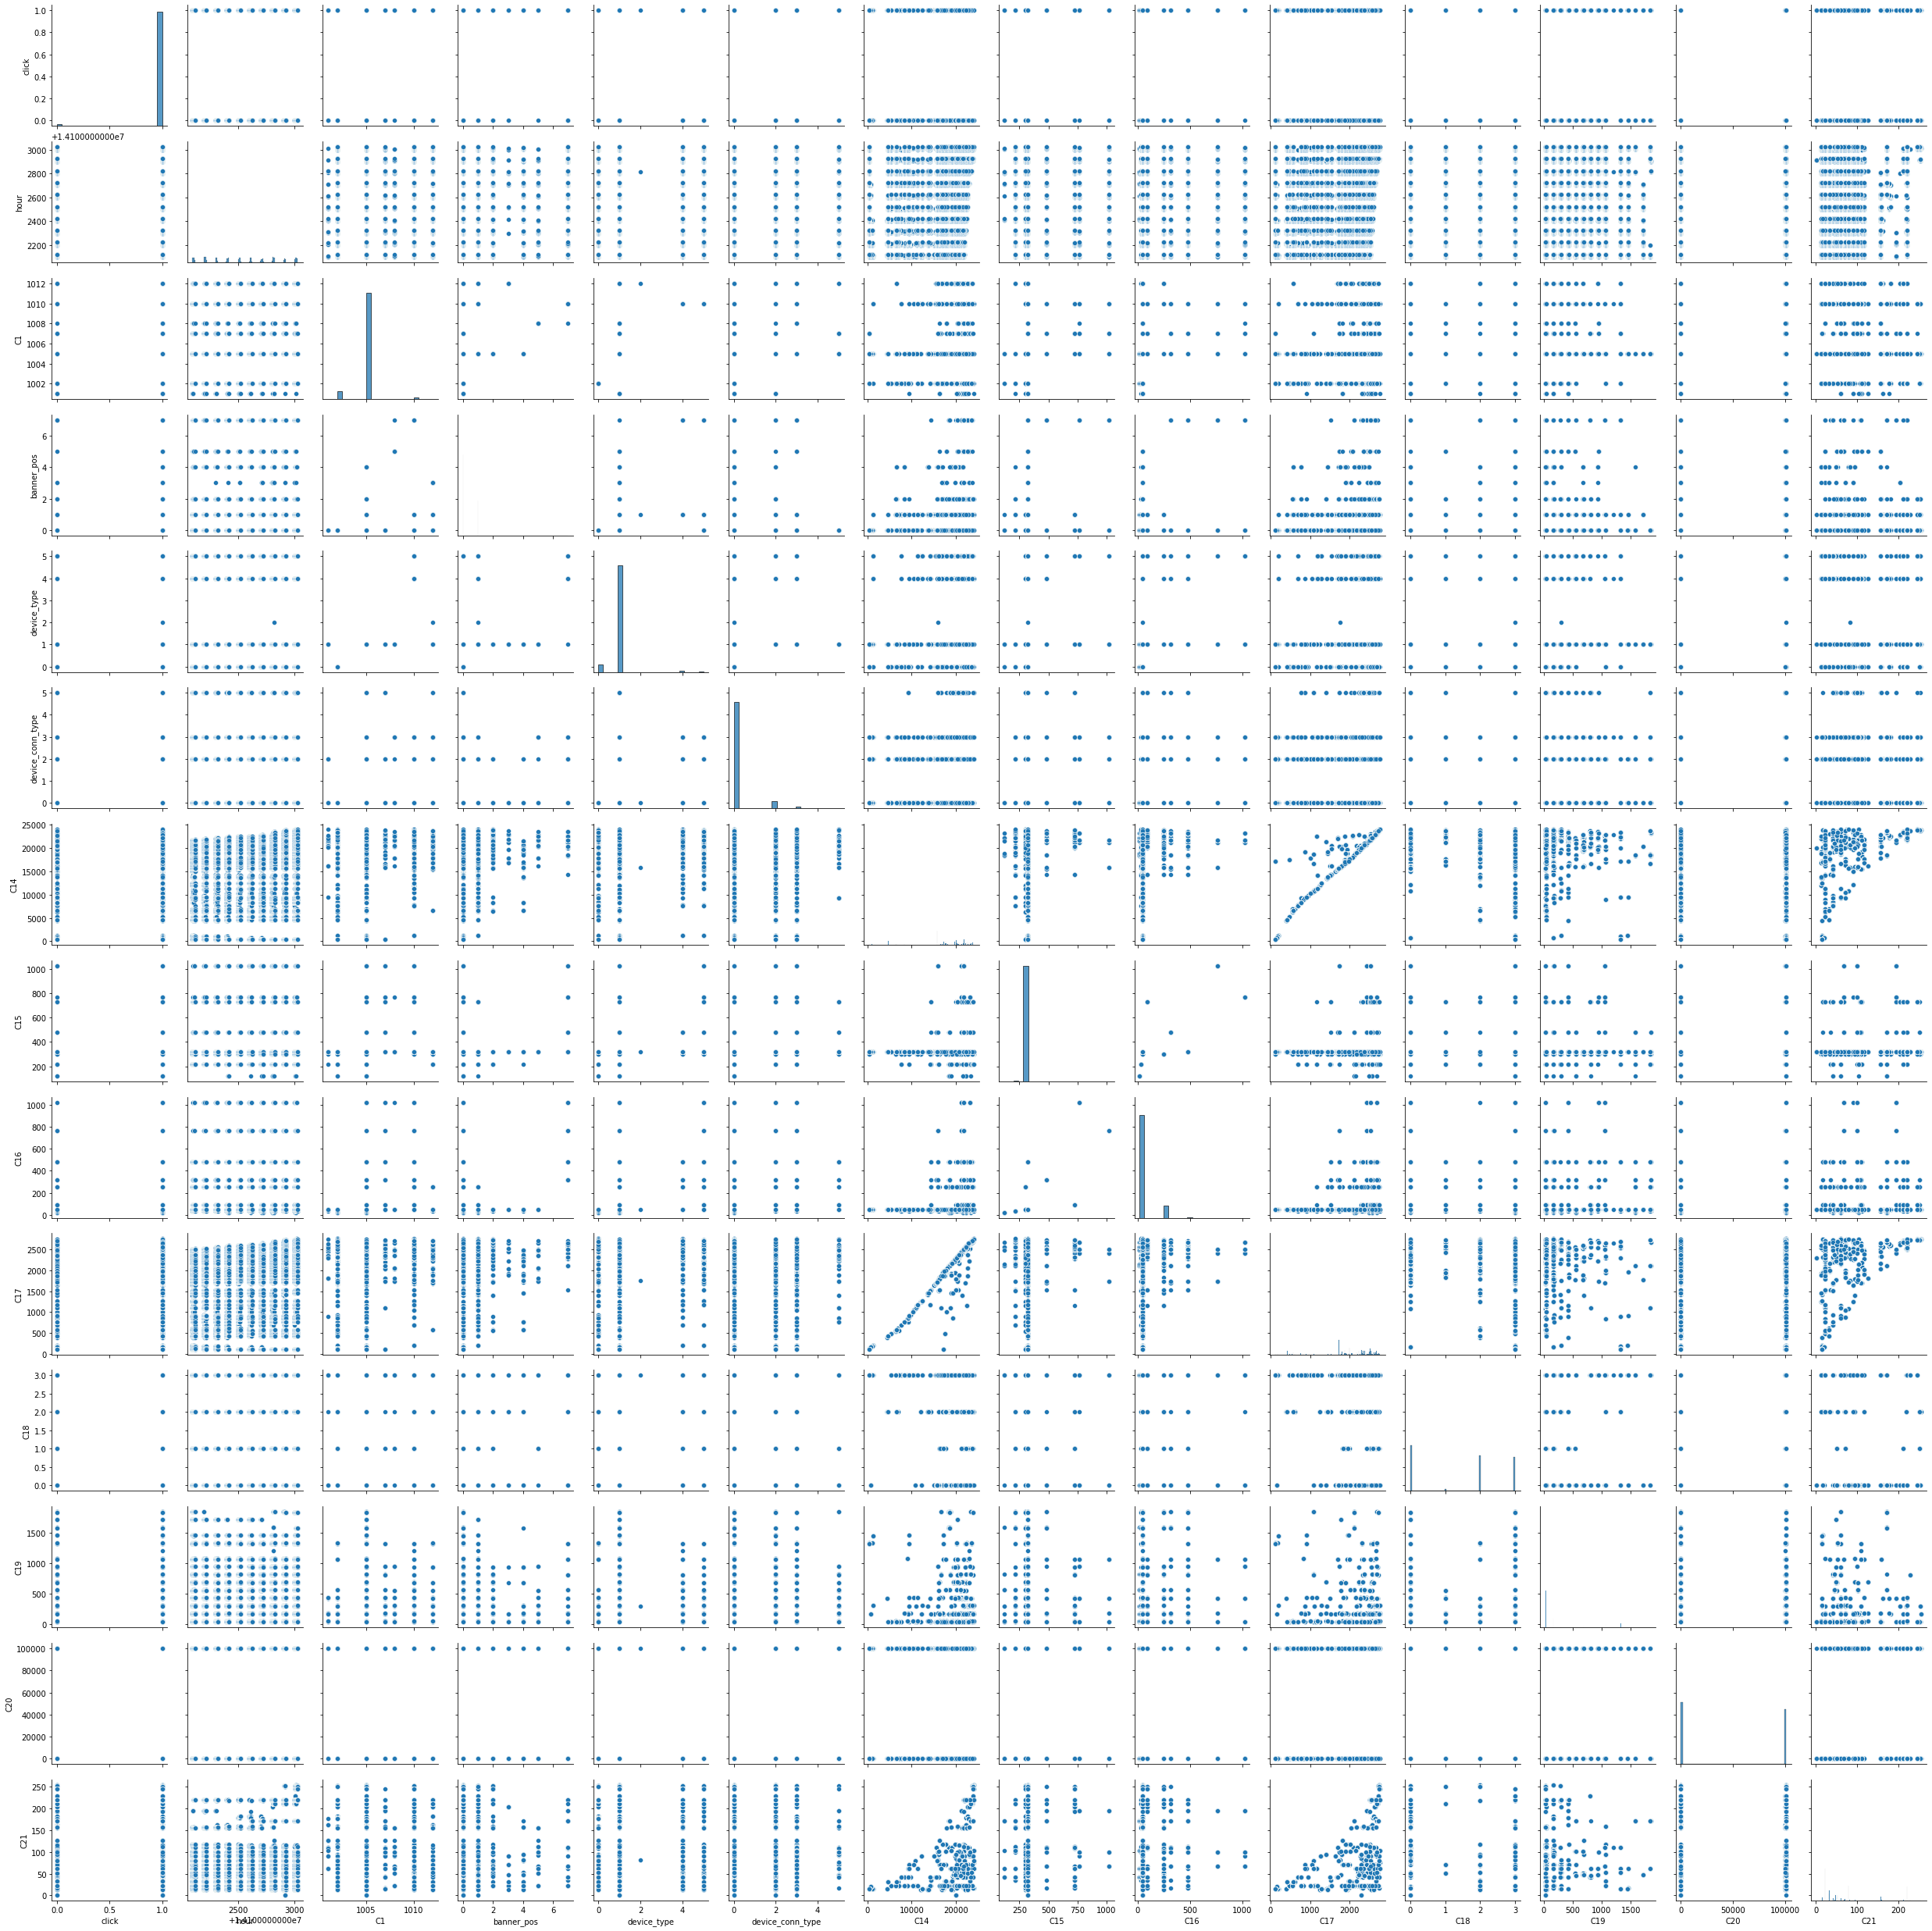

In [18]:
sns.pairplot(data_graph)

From this pairplot, I found that features C14 and C17 are the the only ones that have some sort of positive correlation between each other. These features could hold some importance in future analysis, so I will make sure to note this. In order to analyze the categorical features like site category and site domain, I will be plotting each feature separately with banner position, while differentiating between a click and no click through the hue parameter. 

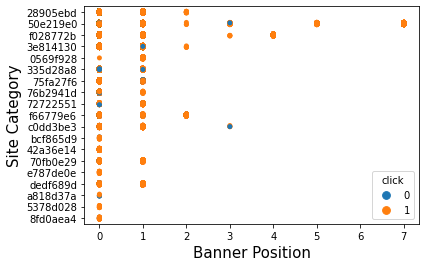

In [26]:
sns.stripplot(data=data_graph, x="banner_pos", y="site_category", hue="click")
plt.xlabel('Banner Position', fontsize=15)
plt.ylabel('Site Category', fontsize=15)
plt.show()

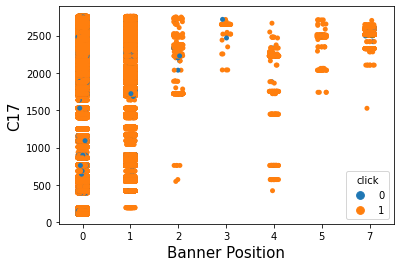

In [25]:
sns.stripplot(data=data_graph, x="banner_pos", y="C17", hue="click")
plt.xlabel('Banner Position', fontsize=15)
plt.ylabel('C17', fontsize=15)
plt.show()

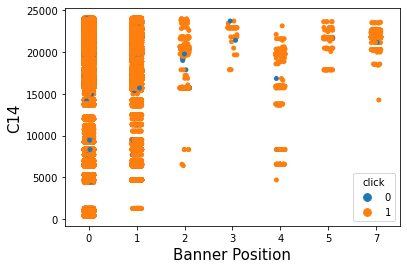

In [20]:
sns.stripplot(data=data_graph, x="banner_pos", y="C14", hue="click")
plt.xlabel('Banner Position', fontsize=15)
plt.ylabel('C14', fontsize=15)
plt.show()

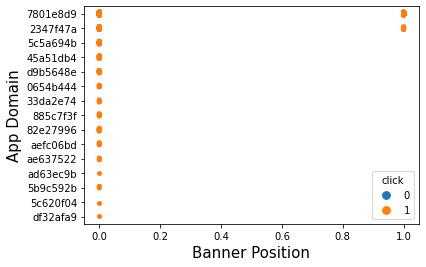

In [30]:
sns.stripplot(data=ex_data, x="banner_pos", y="app_domain", hue="click")
plt.xlabel('Banner Position', fontsize=15)
plt.ylabel('App Domain', fontsize=15)
plt.show()

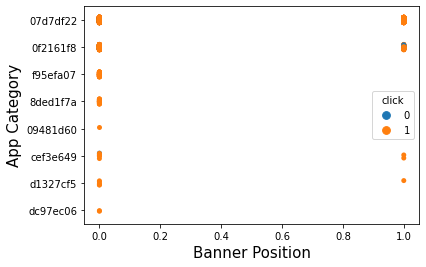

In [31]:
sns.stripplot(data=ex_data, x="banner_pos", y="app_category", hue="click")
plt.xlabel('Banner Position', fontsize=15)
plt.ylabel('App Category', fontsize=15)
plt.show()

### Modeling (formulate null hypothesis and alternative hypothesis)

Null: the prediction of a click is due to chance and not due to the positioning of the ad on the site/app/device

Alternative: the prediction of a click is not due to chance and it has something to do with the positioning of the ad

Going forward, I believe these null and alternative hypotheses would be a good start to my analysis. Even if I fail to reject the null, then the analysis would be informative because then I would know the banner position has no effect on click through rate. However, it might be a better idea to have a null hypothesis that I can reject so that I can find something significant. 

### Conclusion

From these plots, I have found that click, banner position, feature C14, and feature C17 will definitely be important in determining click through rate and creating my models in the future.